In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='Malgun Gothic')
filename = './../data/주요발생국가주간동향(4월2째주).csv'

In [3]:
data = pd.read_csv(filename, index_col='국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [4]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [12]:
type(chartdata) # Series

pandas.core.series.Series

In [9]:
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

# def MakeBarChart01

그래프에 대한 색상을 지정하는 리스트입니다.
예시에서 "w"는 흰색이라서 제외하도록 합니다.

In [10]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

데이터 프레임을 이용하여 막대 그래프를 그려 주는 함수를 호출합니다.

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


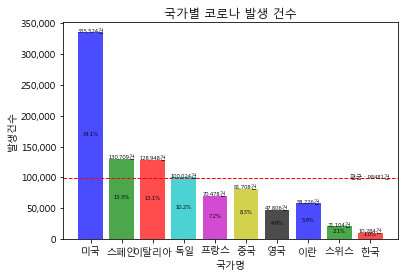

In [11]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', 
               ylabel='발생건수', title='국가별 코로나 발생 건수')

In [31]:
# 데이터 프레임을 사용하여 막대 그래프를 그려 주는 함수입니다.
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked=False, yticks_interval = 10000):
    plt.figure()
    # 범례에 제목을 넣으려면 plot() 메소드의 legend 옵션을 사용해야 합니다.
    chartdata.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked)

    plt.legend(loc='best')

    print(chartdata)

    if stacked == False :
        # max(chartdata.max())은 항목들 값 중에서 최대 값을 의미합니다.
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])
    else : # 누적 막대 그래프
        # 국가별 누적 합인 chartdata.sum(axis=1))의 최대 값에 대한 연산이 이루어 져야 합니다.
        maxlim = (int(max(chartdata.sum(axis=1)) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # y축의 상하한 값이 주어 지는 경우에만 설정합니다.
    if ylim != None :
        plt.ylim(ylim)

# def MakeBarChart02

이번 예시에서는 특정 국가별 특정 일자에 대한 다변량 막대 그래프를 그려 보고자 합니다.

In [32]:
data = pd.read_csv(filename, index_col='국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [33]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]
data.index.name = '국가명'
data.columns.name = '일자'
data

일자,4월06일,4월07일,4월08일
국가명,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

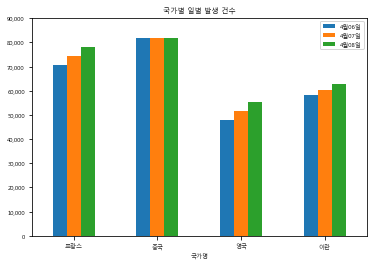

In [34]:
MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수' )

In [35]:
# 전치 프레임을 그래프로 그려 보기
dataT = data.T
dataT

국가명,프랑스,중국,영국,이란
일자,,,,
4월06일,70478,81708,47806,58226
4월07일,74390,81740,51608,60500
4월08일,78167,81802,55242,62589


국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589


<Figure size 432x288 with 0 Axes>

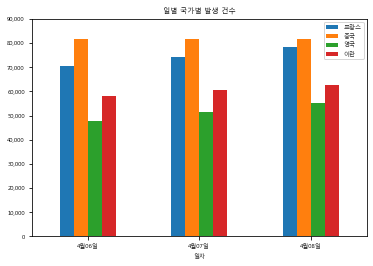

In [36]:
MakeBarChart02(chartdata=dataT, rotation=0, title='일별 국가별 발생 건수')

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

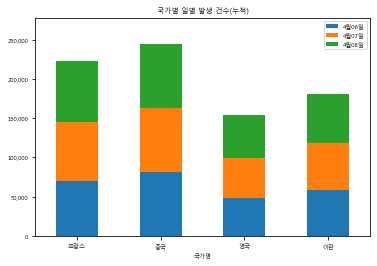

In [37]:
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수(누적)', 
               ylim=[0, ymaxlimit], stacked=True, yticks_interval=50000)

In [38]:
data = pd.read_csv(filename, index_col='국가')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
three

['프랑스', '중국', '영국']

In [42]:
data = data.loc[three]
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [43]:
column_names = data.columns.tolist()
column_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [44]:
# 국가별 numpy 배열을 저장하고 있는 사전
chartdata = {}

for row in data.index:
    # data.loc[row])
    # type(row))
    chartdata[row] = data.loc[row].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790], dtype=int64),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052], dtype=int64),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991], dtype=int64)}

In [45]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax
# end def MakeBarChart03

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x133be460>)

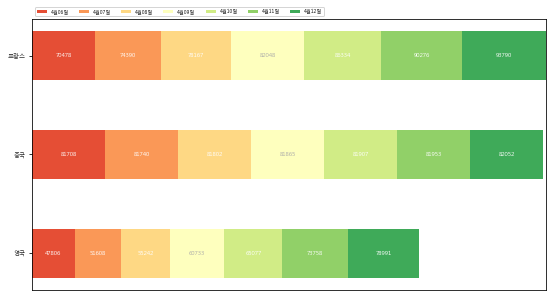

In [46]:
MakeBarChart03(chartdata, column_names)

In [50]:
def MakeBarChart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows=2, ncols=1)  # 2행 1열

    chartdata.plot(kind='bar', ax=axes[0], rot=0, alpha=0.7)

    # color='m'은 자홍색
    chartdata.plot(kind='barh', ax=axes[1], color='m', alpha=0.7)

    fig.suptitle(suptitle)  # sup : super

# end def MakeBarChart04

In [51]:
data = pd.read_csv(filename, index_col='국가')
only_usa = [item for item in data.index if item in ['미국']]

data = data.loc[only_usa].T
data

국가,미국
4월06일,335524
4월07일,364723
4월08일,387547
4월09일,424945
4월10일,461437
4월11일,495535
4월12일,524903


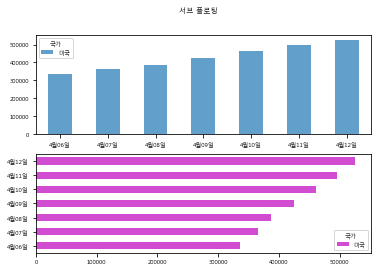

In [52]:
MakeBarChart04(chartdata=data, suptitle='서브 플로팅')

In [53]:
# 엑셀처럼 Table이 존재하는 Bar Chart 그리기
data = pd.read_csv(filename, index_col='국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [56]:
COUNTRY = ['스페인', '프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
data = data.loc[COUNTRY, WHEN]
data

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [57]:
# rows : 테이블에 보이는 행 색인 내용
rows = [x for x in data.index]
rows

['스페인', '프랑스', '중국', '영국', '이란']

In [58]:
# columns : 테이블에 보이는 열 색인 내용
columns = [x for x in data.columns]
columns

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']

In [59]:
max(data.max())

152446

In [60]:
n_rows = len(data) # 행 수
n_rows

5

In [61]:
LEFT_MARGIN = 0.3
index = np.arange(len(columns)) + LEFT_MARGIN
index

array([0.3, 1.3, 2.3, 3.3, 4.3])

In [62]:
bar_width = 1 - 2 * LEFT_MARGIN # 막대 그래프의 너비

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
y_offset

array([0., 0., 0., 0., 0.])

[130709, 135032, 140510, 146690, 152446]
[2464271. 2554652. 2650370. 2762222. 2864350.]
[70478, 74390, 78167, 82048, 86334]
[2534749. 2629042. 2728537. 2844270. 2950684.]
[81708, 81740, 81802, 81865, 81907]
[2616457. 2710782. 2810339. 2926135. 3032591.]
[47806, 51608, 55242, 60733, 65077]
[2664263. 2762390. 2865581. 2986868. 3097668.]
[58226, 60500, 62589, 64586, 66220]
[2722489. 2822890. 2928170. 3051454. 3163888.]


Text(0.5, 1.0, '테이블이 있는 막대 그래프')

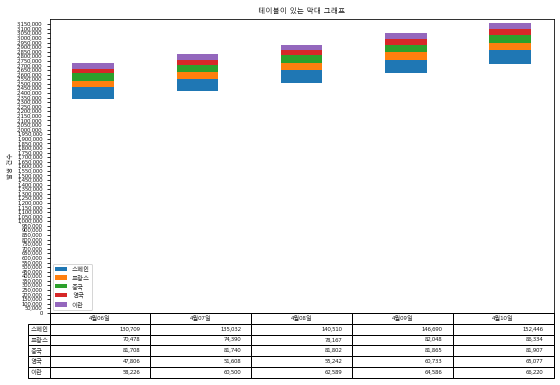

In [80]:
# Plot bars and create text labels for the table
cell_text = [] # 표에 들어 가는 텍스트 내용
plt.figure(figsize=(10, 6))

for row in data.index:
    # print(data[row])
    chartdata = data.loc[row].tolist()
    print(chartdata)

    # bottom
    plt.bar(index, chartdata, bar_width, bottom=y_offset, label=row)

    # y_offset에는 열 단위로 누적된 값이 들어 갑니다.
    y_offset = y_offset + chartdata
    # y_offset = chartdata
    print(y_offset)

    cell_text.append([format(x, ',') for x in chartdata])
    # cell_text.append([format(x, ',') for x in y_offset])
# end for

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')

plt.legend(loc='best')
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("발생 건수")

# values : y축의 눈금의 상한 값과 간격 지정하기
YTICKS_INTERVAL = 50000 # 단위 눈금 간격
maxlim = (int(y_offset.max()/YTICKS_INTERVAL)+1)*YTICKS_INTERVAL
maxlim

values = np.arange(0, maxlim, YTICKS_INTERVAL)

plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.xticks([])
plt.title('테이블이 있는 막대 그래프')

In [77]:
cell_text.reverse()
rows = [rows[idx] for idx in range(len(rows) - 1, -1, -1) ]
rows

['스페인', '프랑스', '중국', '영국', '이란']

In [78]:
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [79]:
cell_text

[['58,226', '60,500', '62,589', '64,586', '66,220'],
 ['47,806', '51,608', '55,242', '60,733', '65,077'],
 ['81,708', '81,740', '81,802', '81,865', '81,907'],
 ['70,478', '74,390', '78,167', '82,048', '86,334'],
 ['130,709', '135,032', '140,510', '146,690', '152,446']]